In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv("bank-full.csv", delimiter = ';')

In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df=df [['age', 'job', 'marital', 'education','balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign',\
       'pdays','previous', 'poutcome', 'y']]

In [6]:
df.describe(include='all')

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211.000000,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,NaN,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,NaN,yes,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,NaN,25130,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,1362.272058,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,3044.765829,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,-8019.000000,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,72.000000,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,448.000000,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,1428.000000,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [7]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [8]:
df['y'].head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [9]:
df['y'] =(df['y'] =='yes').astype(int)

In [10]:
df['y']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
df_full_train , df_test = train_test_split(df,test_size=0.2, random_state =1)
df_train,df_val = train_test_split(df_full_train, test_size =0.2,random_state=1)

In [49]:
df_train =df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [50]:
y_train =df_train.y.values
y_val =df_val.y.values
y_test =df_test.y.values

In [51]:
del df_train['y']
del df_val['y']
del df_test['y']

In [52]:
df_full_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36168 entries, 22468 to 33003
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36168 non-null  int64 
 1   job        36168 non-null  object
 2   marital    36168 non-null  object
 3   education  36168 non-null  object
 4   balance    36168 non-null  int64 
 5   housing    36168 non-null  object
 6   contact    36168 non-null  object
 7   day        36168 non-null  int64 
 8   month      36168 non-null  object
 9   duration   36168 non-null  int64 
 10  campaign   36168 non-null  int64 
 11  pdays      36168 non-null  int64 
 12  previous   36168 non-null  int64 
 13  poutcome   36168 non-null  object
 14  y          36168 non-null  int32 
dtypes: int32(1), int64(7), object(7)
memory usage: 4.3+ MB


In [53]:
numerical =['age','balance','day','duration','campaign','pdays','previous']

In [55]:
from sklearn.metrics import roc_auc_score

for column in numerical:
    
    score = roc_auc_score(y_train,df_train[column])
    if score < 0.5:
        score = roc_auc_score(y_train,-df_train[column])
    print(column, score)
    


age 0.5093559626867956
balance 0.5899473804882456
day 0.5266972296878812
duration 0.8142915057456301
campaign 0.5709481489548798
pdays 0.5907520267644112
previous 0.5993297719838377


In [56]:
categorical =['job','marital','education','housing','contact','month','poutcome']

In [57]:
train_dicts =df_train[categorical + numerical].to_dict(orient='records')

In [59]:
from sklearn.feature_extraction import DictVectorizer

dv =DictVectorizer(sparse=False)
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [60]:
X_train =dv.fit_transform(train_dicts)

In [61]:
val_dicts =df_val[categorical + numerical].to_dict(orient='records')
X_val=dv.transform(val_dicts)

In [62]:
from sklearn.linear_model import LogisticRegression

model =LogisticRegression(solver='liblinear', C=1.0, max_iter=1000,random_state=1)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=1, solver='liblinear')

In [63]:
y_pred = model.predict_proba(X_val)[:,1]

In [65]:
roc_auc_score(y_val,y_pred)

0.8993500861971422

In [72]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


    

In [73]:
threshold = np.arange(0.0,1.01,0.01)

precision =[]
recall =[]

for th in threshold:
    y_pred = model.predict_proba(X_val)[:,1]
    y_pred_thres = y_pred >= th
    p = precision_score(y_val,y_pred_thres)
    r = recall_score(y_val,y_pred_thres)
    precision.append(p)
    recall.append(r)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


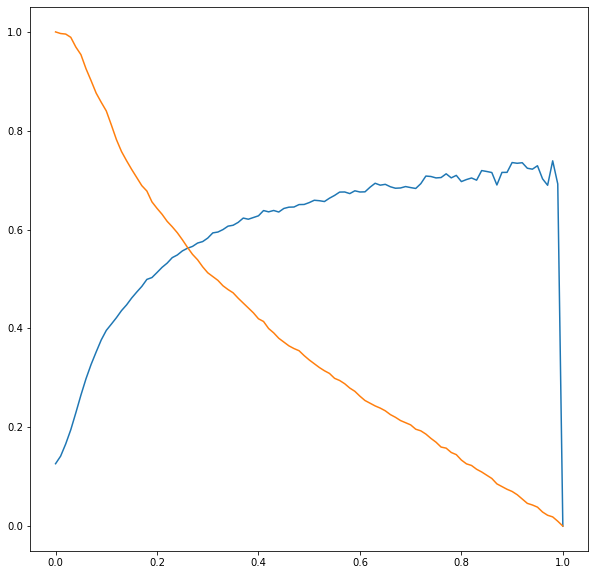

In [75]:
plt.figure(figsize=(10,10))
plt.plot(threshold, precision)
plt.plot(threshold,recall)
plt.show()

In [76]:
from sklearn.metrics import f1_score

In [79]:
f =[]

for th in threshold:
    y_pred = model.predict_proba(X_val)[:,1]
    y_pred_thres = y_pred >= th
    f1= f1_score(y_val,y_pred_thres)
    f.append(f1)

print(max(f))


0.5750116117045982


In [80]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits =5, shuffle =True, random_state =1)

In [81]:
def train(df,y_train,C=1.0):
    dicts =df[categorical + numerical].to_dict(orient='records')
    dv= DictVectorizer(sparse=False)
    X_train =dv.fit_transform(dicts)
    
    model =LogisticRegression(solver='liblinear',C=C,max_iter =10000)
    model.fit(X_train,y_train)
    
    return dv, model

In [82]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    X= dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]
    
    return y_pred

In [84]:
scores =[]

for train_idx, val_idx in kfold.split(df_full_train):
    df_train=df_full_train.iloc[train_idx]
    df_val =df_full_train.iloc[val_idx]
    
    y_train =df_train.y.values
    y_val =df_val.y.values
    
    dv,model =train(df_train,y_train)
    y_pred =predict(df_val,dv,model)
    
    auc =roc_auc_score(y_val,y_pred)
    scores.append(auc)

In [85]:
scores

[0.8997325107480013,
 0.8989199463293431,
 0.9112517872634994,
 0.9081928839832232,
 0.91217882418995]

In [89]:
scores_np = np.array(scores)

In [90]:
scores_np.std()

0.005656168836598589

In [95]:
scores =[]

for C in [0.000001, 0.001, 1]:
    split =0
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train=df_full_train.iloc[train_idx]
        df_val =df_full_train.iloc[val_idx]
    
        y_train =df_train.y.values
        y_val =df_val.y.values
    
        dv,model =train(df_train,y_train,C=C)
        y_pred =predict(df_val,dv,model)
    
        auc =roc_auc_score(y_val,y_pred)
        scores.append(auc)
        split+=1

In [96]:
scores

[(1e-06, 0, 0.6847426813003405),
 (1e-06, 1, 0.700093195088892),
 (1e-06, 2, 0.7120471006278472),
 (1e-06, 3, 0.7087058212547206),
 (1e-06, 4, 0.7016341366114567),
 (0.001, 0, 0.8483340966229331),
 (0.001, 1, 0.8596190157445057),
 (0.001, 2, 0.8642176622442287),
 (0.001, 3, 0.8686199428355308),
 (0.001, 4, 0.8634084898272779),
 (1, 0, 0.8997325107480013),
 (1, 1, 0.8989199463293431),
 (1, 2, 0.9112517872634994),
 (1, 3, 0.9081928839832232),
 (1, 4, 0.91217882418995)]

In [98]:

for C in [0.000001, 0.001, 1]:
    scores =[]
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train=df_full_train.iloc[train_idx]
        df_val =df_full_train.iloc[val_idx]
    
        y_train =df_train.y.values
        y_val =df_val.y.values
    
        dv,model =train(df_train,y_train,C=C)
        y_pred =predict(df_val,dv,model)
    
        auc =roc_auc_score(y_val,y_pred)
        scores.append(auc)
        
    np_scores =np.array(scores)
    print(C, np_scores.mean(),np_scores.std())
    
        
  

1e-06 0.7014445869766514 0.009444095099939862
0.001 0.8608398414548952 0.0068763605847288085
1 0.9060551905028035 0.005656168836598589
